In [1]:
import rasterio
from rasterio.features import geometry_mask
import geopandas as gpd
import numpy as np
from tqdm import tqdm

crs_path = '/work/users/jn906hluu/S2_Frankenwald_daily/2019_03_17/response.tiff'
shape_file_path = '/work/users/jn906hluu/RSP/ForestCoverPatternStudy/Layers/DLM250/veg02_f.shp'
example_path = '/work/users/jn906hluu/example.tif'

# Load the Shapefile as a GeoDataFrame
gdf = gpd.read_file(shape_file_path)

with rasterio.open(crs_path) as src:
    raster_crs = src.crs

with rasterio.open(example_path) as src:
    # Get the shape of the raster file
    raster_shape = src.shape[:2]

    # Convert the GeoDataFrame to the CRS of the raster file
    shapefile = gdf.to_crs(raster_crs)

    # Get the transform of the raster file
    raster_transform = src.transform

    # Initialize an empty mask
    mask_all = np.zeros(raster_shape, dtype=bool)

In [25]:
gdf.geometry[0].area / 1e5

9.306159785233879

In [24]:
shapefile.geometry[0].area 

0.00011290837262106241

In [45]:
x_l = []
for x in gdf.geometry:
    x_l.append(x.area / 1e5)

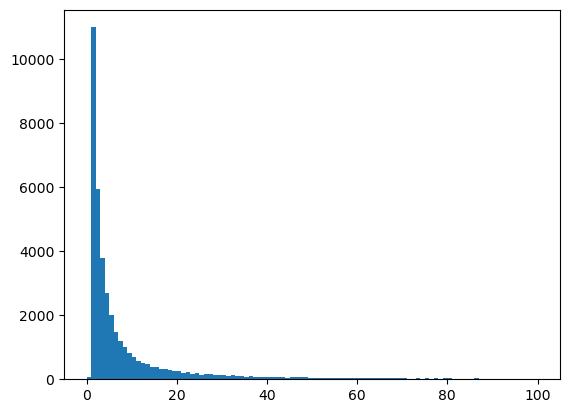

In [46]:
import matplotlib.pyplot as plt

plt.hist(x_l, bins=100, range=(0,100))
plt.show()

In [73]:
gdf

,LAND,MODELLART,OBJART,OBJART_TXT,OBJID,HDU_X,BEGINN,ENDE,NAM,RGS,ZUS,BEMERKUNG,geometry
0,DE,DLM250,43002,AX_Wald,DEBKGDL200009EBR,None,2021-12-31T08:00:00Z,None,None,None,None,None,"POLYGON ((490191.417 5350901.934, 490107.099 5..."
1,DE,DLM250,43002,AX_Wald,DEBKGDL200009EBV,None,2021-12-31T08:00:00Z,None,None,None,None,None,"POLYGON ((449303.722 5298070.406, 449510.369 5..."
2,DE,DLM250,43002,AX_Wald,DEBKGDL200009EC1,None,2021-12-31T08:00:00Z,None,Bernhauser Holz,None,None,None,"POLYGON ((539541.841 5319815.922, 539554.617 5..."
3,DE,DLM250,43002,AX_Wald,DEBKGDL200009C1K,None,2021-12-31T08:00:00Z,None,None,None,None,None,"POLYGON ((452313.749 5279715.685, 452420.961 5..."
4,DE,DLM250,43002,AX_Wald,DEBKGDL200009C1Q,None,2021-12-31T08:00:00Z,None,None,None,None,None,"POLYGON ((431409.376 5315130.007, 431579.197 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40320,DE,DLM250,43002,AX_Wald,DEBKGDL200018CTZ,None,2021-12-31T08:00:00Z,None,None,None,None,None,"POLYGON ((720059.763 5784969.483, 720041.936 5..."
40321,DE,DLM250,43002,AX_Wald,DEBKGDL200018CU7,None,2021-12-31T08:00:00Z,None,None,None,None,None,"POLYGON ((750204.540 5766687.456, 750024.197 5..."
40322,DE,DLM250,43002,AX_Wald,DEBKGDL200018CU4,None,2021-12-31T08:00:00Z,None,None,None,None,None,"POLYGON ((747414.184 5765066.754, 748240.996 5..."
40323,DE,DLM250,43002,AX_Wald,DEBKGDL200018CU3,None,2021-12-31T08:00:00Z,None,None,None,None,None,"POLYGON ((721868.457 5781706.437, 722074.376 5..."


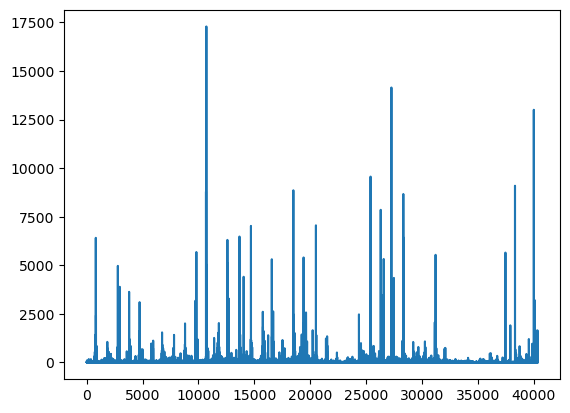

In [47]:
plt.plot(x_l)

In [65]:
len([print(x) for x in gdf.NAM if x != None])

Bernhauser Holz
Bubenholz
Reutlinger Holz
Im überer Lankrain
Oberwald
Großes Moos
Tüfinger Wald
Bürgbergerhölzle
Allmendwald
Kernhölzle
Talholz
Beermoos
Hart
Eichhölzle
Buchenegg
Eichhalde
Sonnholen
Rauschachen
Untereichholz
Spatzenwald
Reutenhau
Siggenweiler Holz
Lange Halde
Oberholz
Lorettowald
Stadtholz
Bannholz
Bächleholz
Hasenhölzle
Härtlewald
Enzhau
Berghölzle
Herrenwäldele
Reitersbühl
Großholz
Ertenhag
Eichle
Bitz-Wäldle
Kaiserswald
Kirchholz
Birkstock
Moosholz
Hölzle
Schwedenholz
Mooswald
Ghau
Hanselholz
Degenhart
Mitzeiche
Wuhrholz
Töbler
Stegholz
Hochhölzle
Schäfleshau
Espen
Lumperholz
Stauden
Kirchberghölzle
Stittholz
Rumisbol
Metzenmoos
Haslen
Weißwald
Lohrenwald
Heidengestäud
Großholz
Bannholz
Vorderföhrle
Heiligenholz
Buchholz
Feindschießen
Läuble
Hartwald
Nank
Hornwald
Hölzle
Kehlwald
Zwölferholz
Haslen
Beitzenhart
Forstwald
Neidling
Hornung
Oberholz
Teilerwald
Zühneholz
Schachen
Schmalholz
Dorferholz
Herrenzimmernwald
Hirsch-brunnen
Unzenholz
Buchholz
Johanniterwald
Stu

11141

In [69]:
gdf.NAM[np.where(x_l > np.quantile(x_l, 0.999))[0]]

818                       None
819                       None
2791                      None
2959                      None
3799                      None
4736                      None
9732                      None
9813                      None
10672                     None
10707                     None
10728                     None
12588                     None
12600                     None
12616                     None
12719                     None
13668                     None
13669                     None
14040                     None
14694                     None
16558                     None
16560                     None
16680                     None
18486                     None
19400                     None
20505                     None
25386    Staatsforst Hardegsen
25390                     None
26298                     None
26430                     None
26566                     None
27248            Dübener Heide
27250                     None
27255   

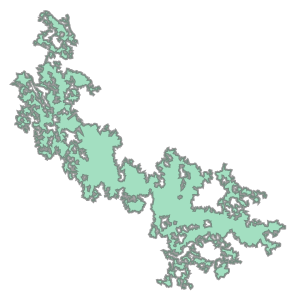

In [57]:
gdf.geometry[4736]